Librerias 

In [13]:
import numpy as np
from collections import deque,Counter
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

Distancia Euclidiana 

In [14]:
def eu_dist(point1,point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))


Distancia Manhattan

In [15]:
def man_dist(point1,point2):
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

Distancia Coseno

In [16]:
def cos_dist(point1,point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    dot_product = np.dot(point1, point2)
    norm1 = np.linalg.norm(point1)
    norm2 = np.linalg.norm(point2)
    if norm1 == 0 or norm2 == 0:
        return 1.0  
    return 1 - (dot_product / (norm1 * norm2))

Distancia datos categoricos

In [17]:
def cat_dist(point1, point2):
    return sum(1 for x, y in zip(point1, point2) if x != y) / len(point1)

DBSCAN

In [18]:
def reg_query(data, point_idx, eps, dist_metric):
    neighbors = []
    for idx, point in enumerate(data):
        if dist_metric(data[point_idx], point) <= eps:
            neighbors.append(idx)
    return neighbors

def ex_cluster(data, labels, point_idx, cluster_id, neighbors, eps, min_samples, dist_metric):
    labels[point_idx] = cluster_id
    queue = deque(neighbors)

    while queue:
        neighbor_idx = queue.popleft()
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
        elif labels[neighbor_idx] == 0:
            labels[neighbor_idx] = cluster_id
            new_neighbors = reg_query(data, neighbor_idx, eps, dist_metric)
            if len(new_neighbors) >= min_samples:
                queue.extend(new_neighbors)

def dbscan(data, eps, min_samples, dist_metric):
    labels = [0] * len(data)
    cluster_id = 0
    for point_idx in range(len(data)):
        if labels[point_idx] != 0:
            continue 

        neighbors = reg_query(data, point_idx, eps, dist_metric)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        
        else:
            cluster_id += 1
            ex_cluster(data, labels, point_idx, cluster_id, neighbors, eps, min_samples, dist_metric)
        
    return labels


Ejemplo 

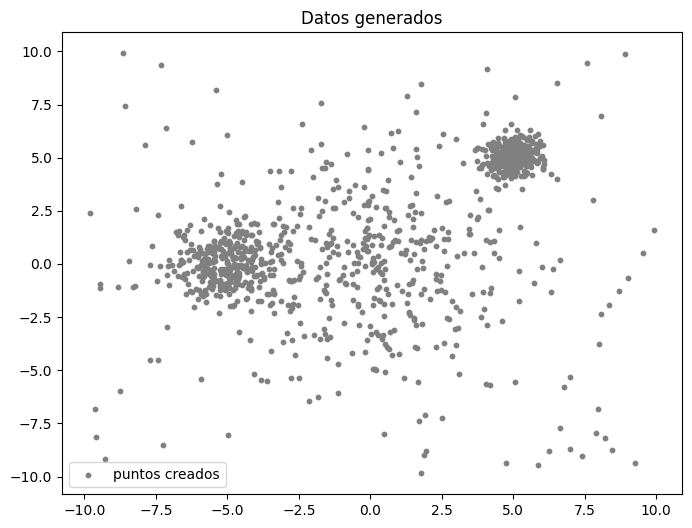

In [19]:
from sklearn.datasets import make_blobs
centros = [[-5, 0], [0, 0], [5, 5]]
cluster_std = [1.0, 2.5, 0.5]  
X, y = make_blobs(n_samples=1000, centers=centros, cluster_std=cluster_std, random_state=42)

# Añadir puntos aleatorios como ruido
noise = np.random.uniform(low=-10, high=10, size=(100, 2))
X_data = np.vstack([X, noise])
plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, c='gray', label="puntos creados")
plt.title("Datos generados")
plt.legend()
plt.show()

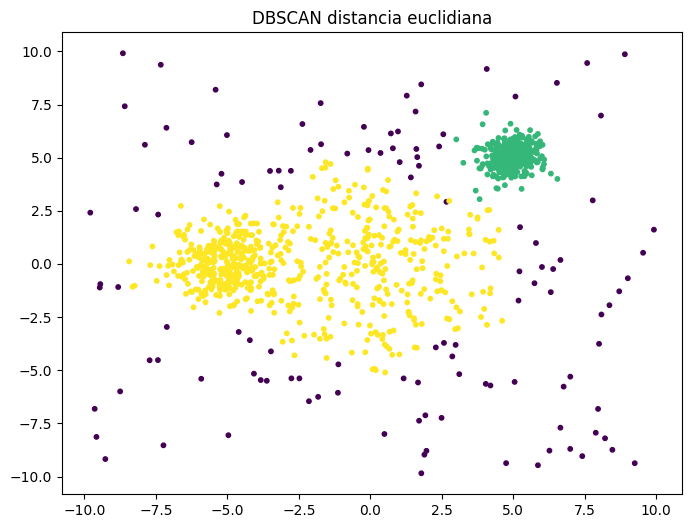

In [26]:
eps = 1
min_samples = 10
labels = dbscan(X_data, eps, min_samples, eu_dist)
plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', s=10)
plt.title("DBSCAN distancia euclidiana")
plt.show()

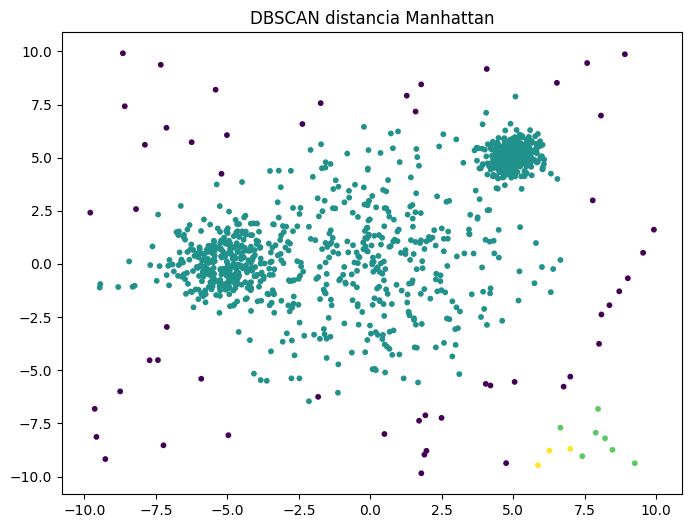

In [21]:
labels = dbscan(X_data, eps, min_samples, man_dist)
plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', s=10)
plt.title("DBSCAN distancia Manhattan")
plt.show()

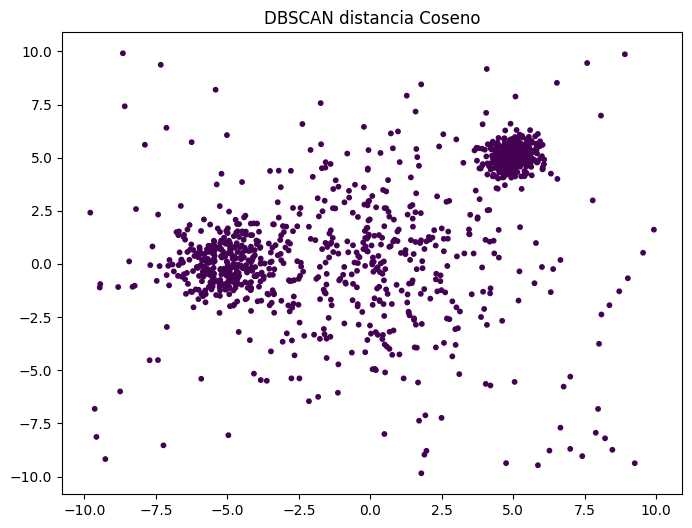

In [22]:
labels = dbscan(X_data, eps, min_samples, cos_dist)
plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', s=10)
plt.title("DBSCAN distancia Coseno")
plt.show()

Ejemplo datos categoricos 

In [23]:
import random
import pandas as pd 
colores = ['Rojo', 'Azul', 'Verde', 'Amarillo', 'Negro', 'Blanco']
figuras = ['Cuadrado', 'Círculo', 'Triángulo', 'Rectángulo', 'Pentágono']
tamaño = ['Grande', 'Mediano', 'Pequeño']


datos_categoricos = pd.DataFrame({
    'Color': [random.choice(colores) for _ in range(100)],
    'Forma': [random.choice(figuras) for _ in range(100)],
    'Tamaño': [random.choice(tamaño) for _ in range(100)]
})
datos_categoricos_c = datos_categoricos.values.tolist()
eps_categorical = 0.4  
min_samples = 3
cluster = dbscan(datos_categoricos_c, eps_categorical, min_samples, cat_dist)
datos_categoricos['Cluster'] = cluster
datos_categoricos

,Color,Forma,Tamaño,Cluster
0,Verde,Cuadrado,Pequeño,1
1,Amarillo,Triángulo,Grande,1
2,Verde,Pentágono,Pequeño,1
3,Negro,Triángulo,Mediano,1
4,Blanco,Círculo,Mediano,1
...,...,...,...,...
95,Azul,Triángulo,Pequeño,1
96,Amarillo,Triángulo,Mediano,1
97,Verde,Rectángulo,Grande,1
98,Rojo,Rectángulo,Pequeño,1
